In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import read_log

# Backtest

In [18]:
sandbox, activities, trades = read_log('../backtests/2025-04-22_10-28-48.log')

Error parsing JSON: Expecting property name enclosed in double quotes: line 9 column 3 (char 159)


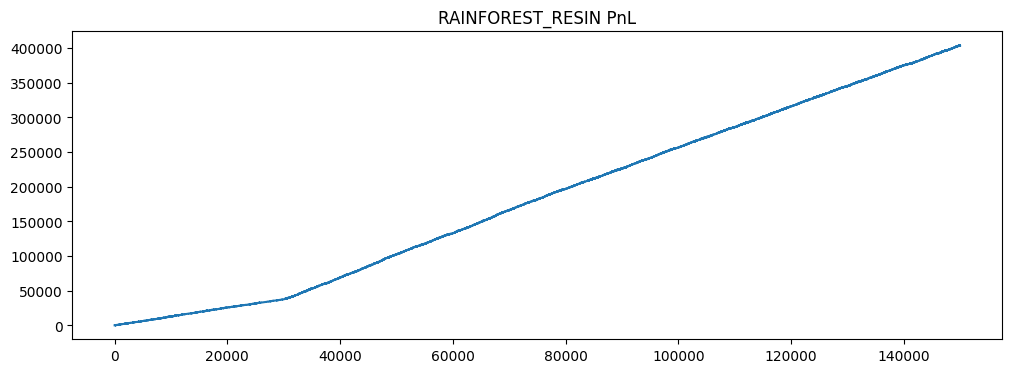

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

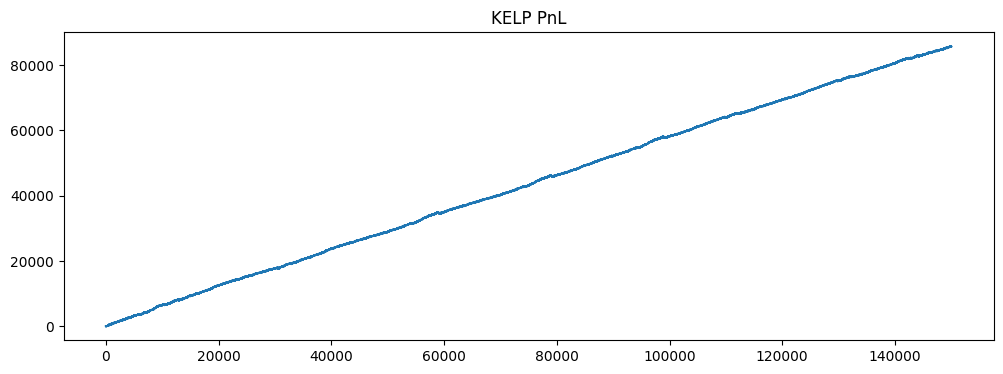

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

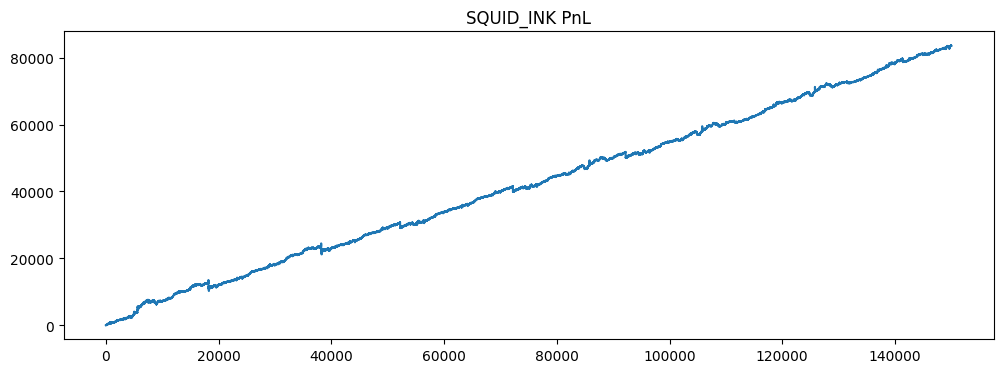

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

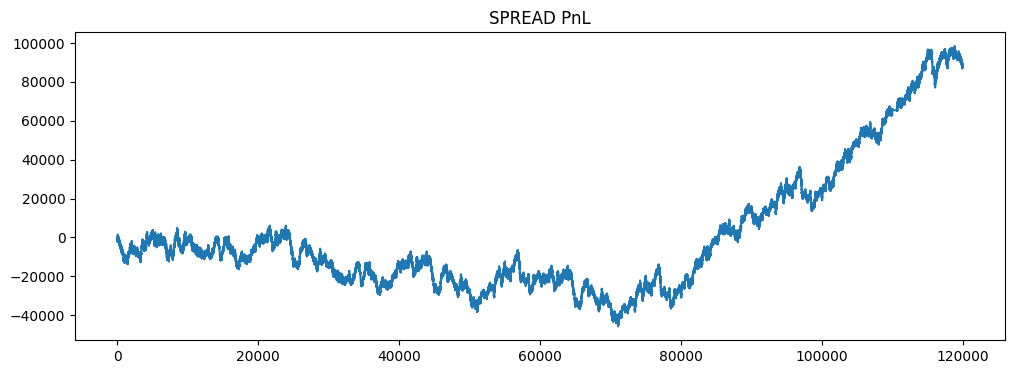

In [22]:
spr_pnl = (activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

plt.figure(figsize=(12, 4))
plt.plot(spr_pnl)
plt.title('SPREAD PnL')
plt.show()

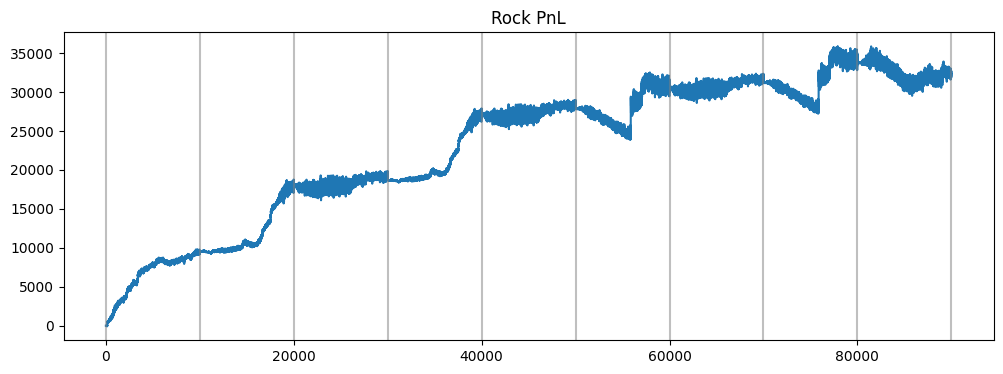

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
plt.title('Rock PnL')
for i in np.arange(0, 10) * 10000:
    plt.axvline(i, c='gray', alpha=0.5)
plt.show()

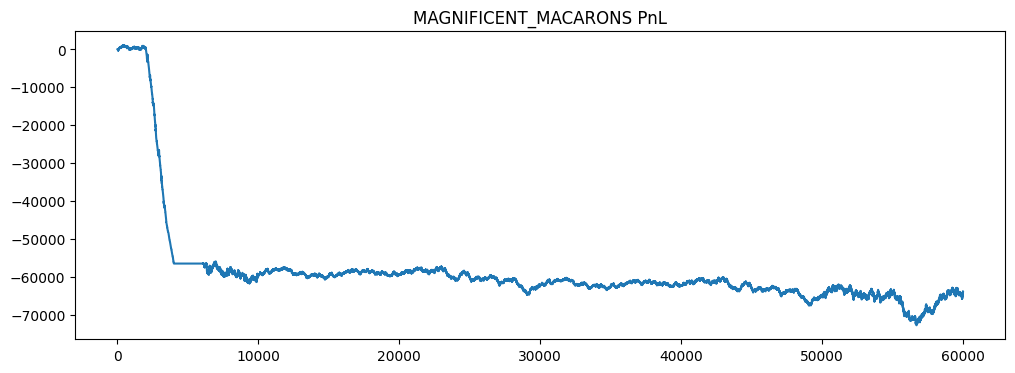

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy())
plt.title('MAGNIFICENT_MACARONS PnL')
plt.show()

# v_0

In [10]:
sandbox, activities, trades = read_log('../data/logs/round_5/v0.log')

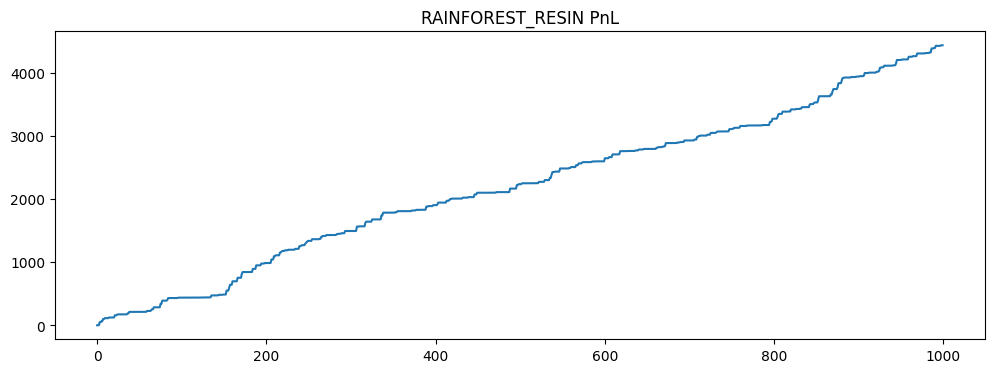

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

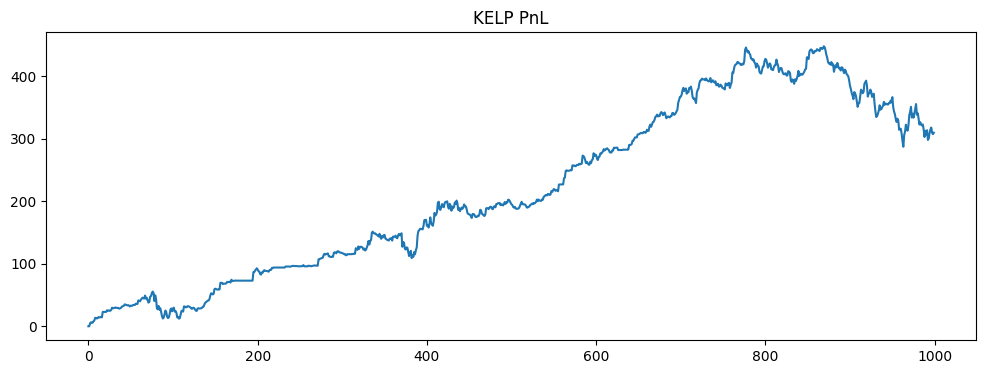

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

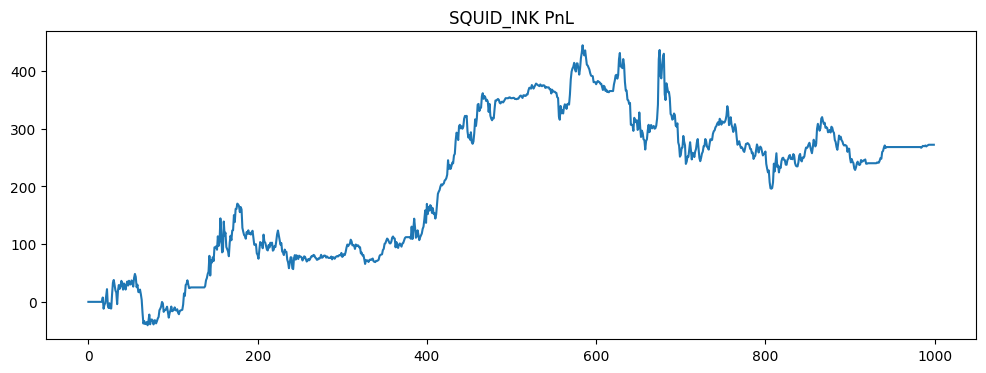

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

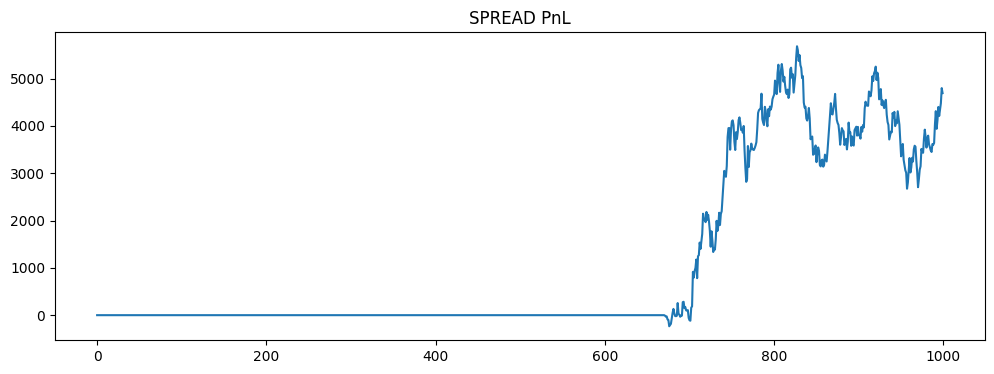

In [14]:
spr_pnl = (activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

plt.figure(figsize=(12, 4))
plt.plot(spr_pnl)
plt.title('SPREAD PnL')
plt.show()

C:\Users\aeali\AppData\Local\Temp\ipykernel_3600\2536541983.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
C:\Users\aeali\AppData\Local\Temp\ipykernel_3600\2536541983.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()


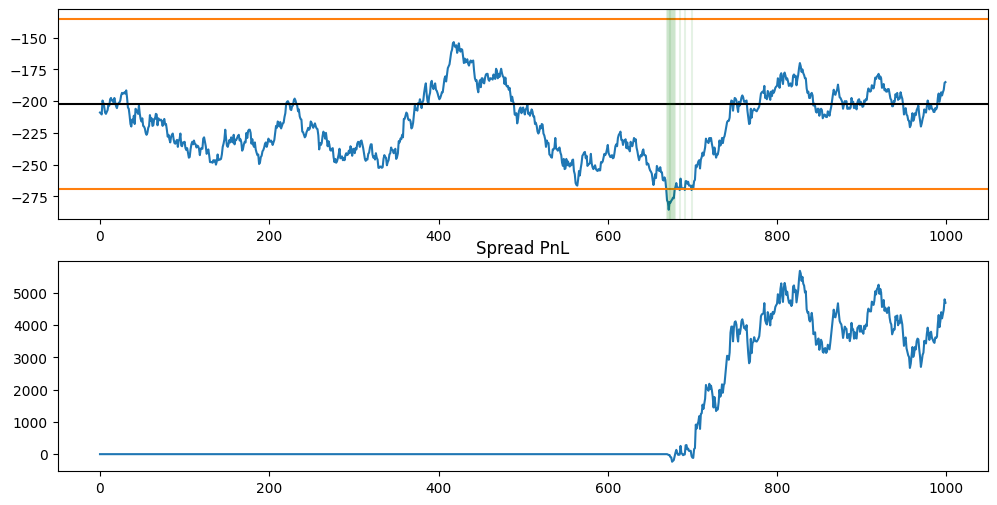

In [15]:
spr3 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

mean = -202.3
std = 83.9

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(spr3)
ax[0].axhline(mean, c='k')
ax[0].axhline(mean + 0.8 * std, c='tab:orange')
ax[0].axhline(mean - 0.8 * std, c='tab:orange')
for b in buys:
    ax[0].axvline(b, c='g', alpha=0.1)
for s in sells:
    ax[0].axvline(s, c='r', alpha=0.1)
ax[1].plot(spr_pnl)
ax[1].set_title('Spread PnL')
plt.show()

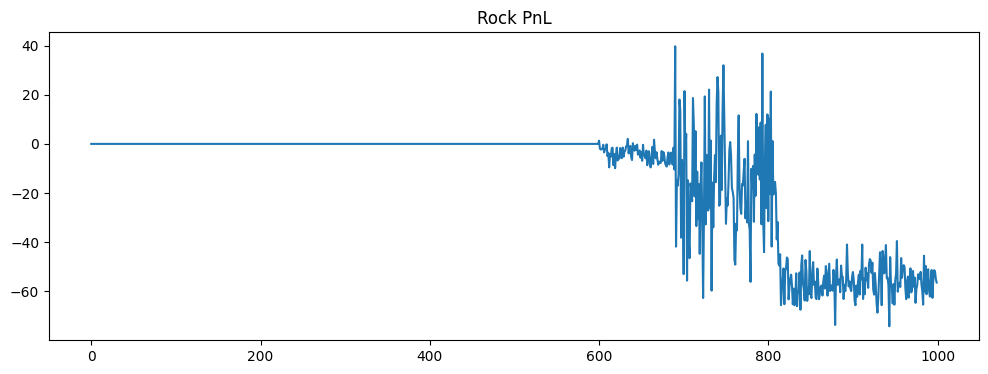

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
plt.title('Rock PnL')
plt.show()

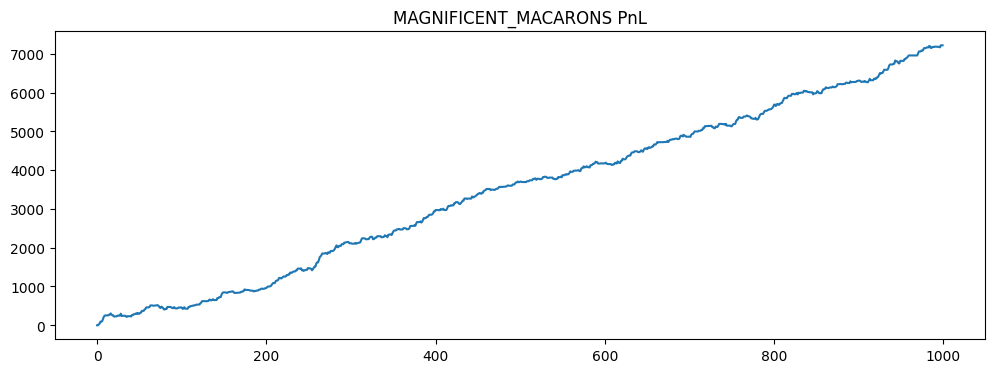

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy())
plt.title('MAGNIFICENT_MACARONS PnL')
plt.show()

# Directional

In [210]:
sandbox, activities, trades = read_log('../data/logs/round_5/directional.log')

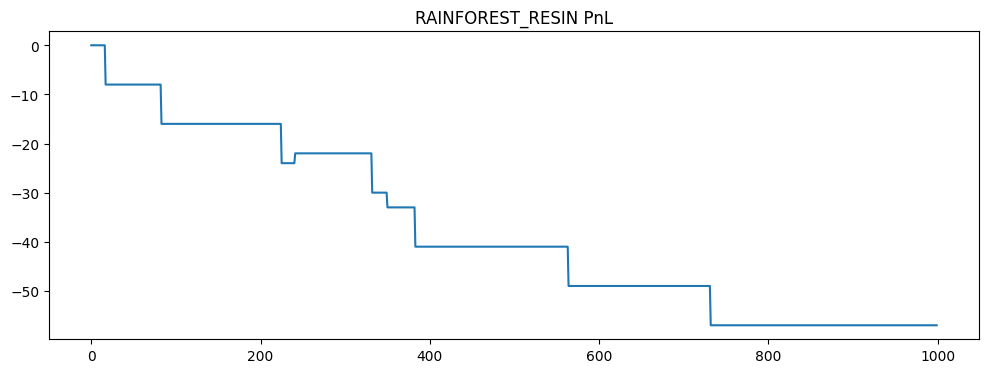

In [211]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

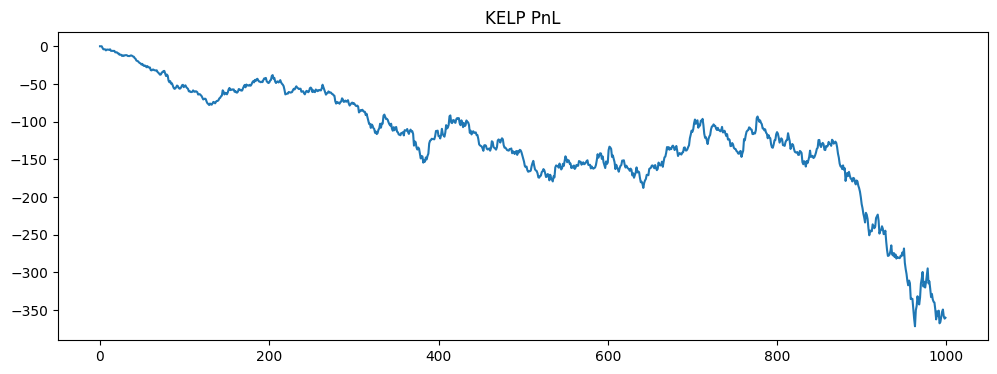

In [212]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

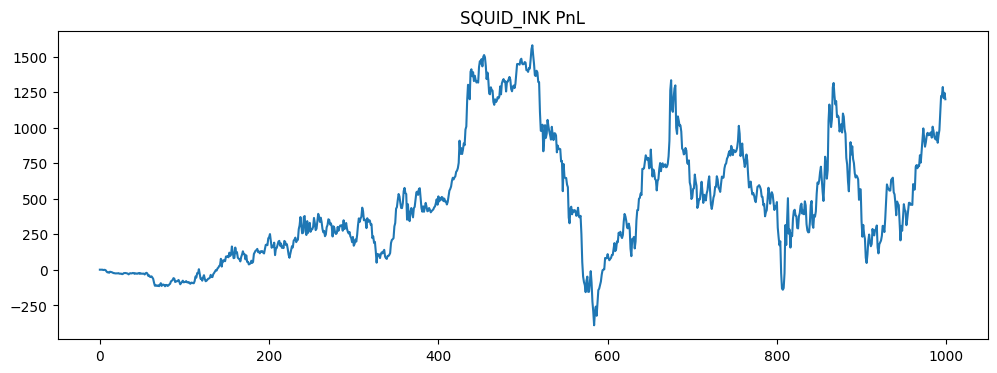

In [213]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

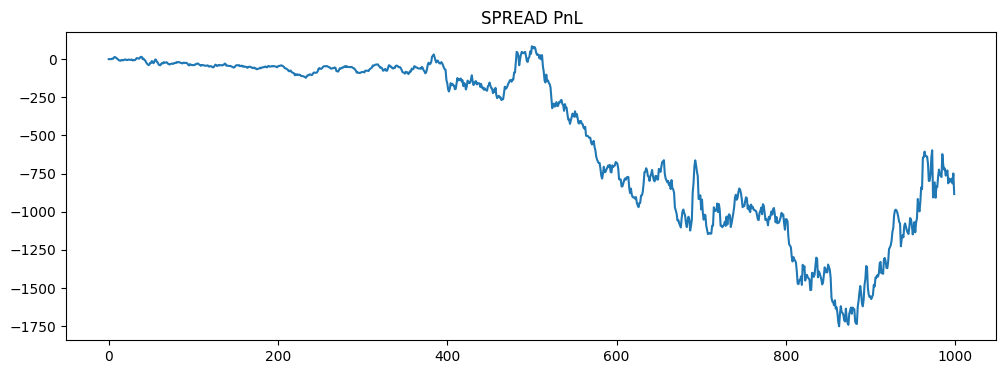

In [214]:
spr_pnl = (activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

plt.figure(figsize=(12, 4))
plt.plot(spr_pnl)
plt.title('SPREAD PnL')
plt.show()

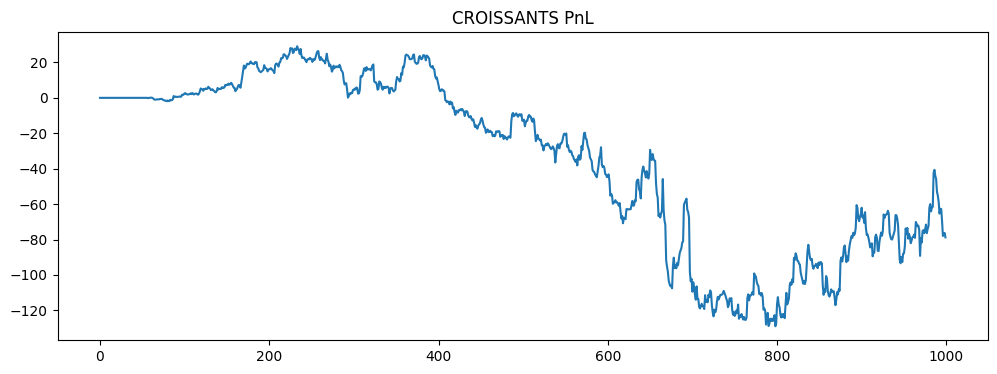

In [215]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy())
plt.title('CROISSANTS PnL')
plt.show()

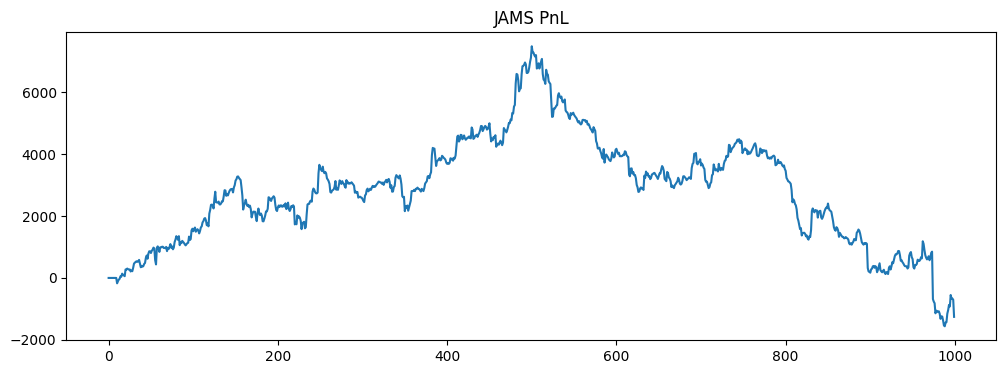

In [198]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy())
plt.title('JAMS PnL')
plt.show()

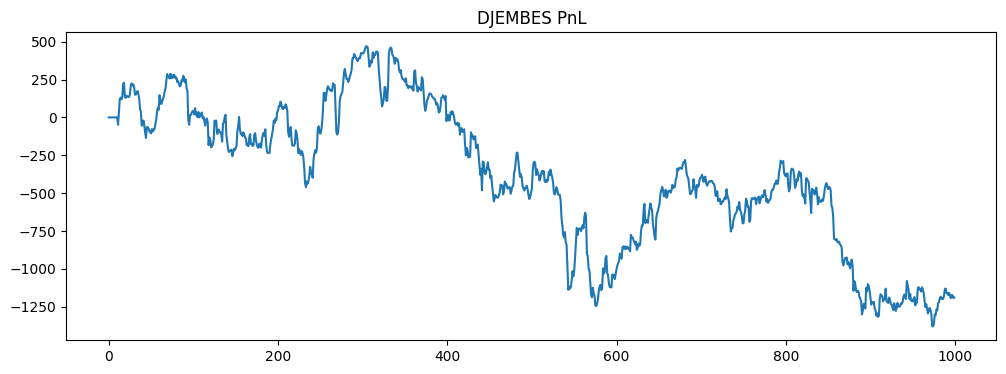

In [199]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())
plt.title('DJEMBES PnL')
plt.show()

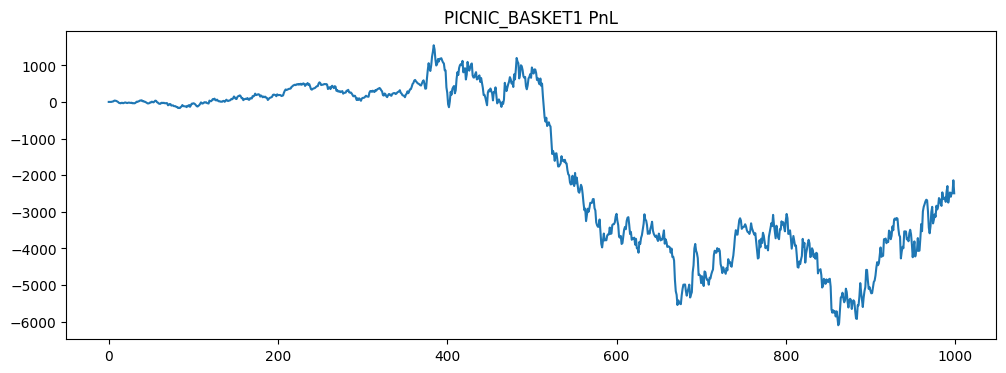

In [200]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy())
plt.title('PICNIC_BASKET1 PnL')
plt.show()

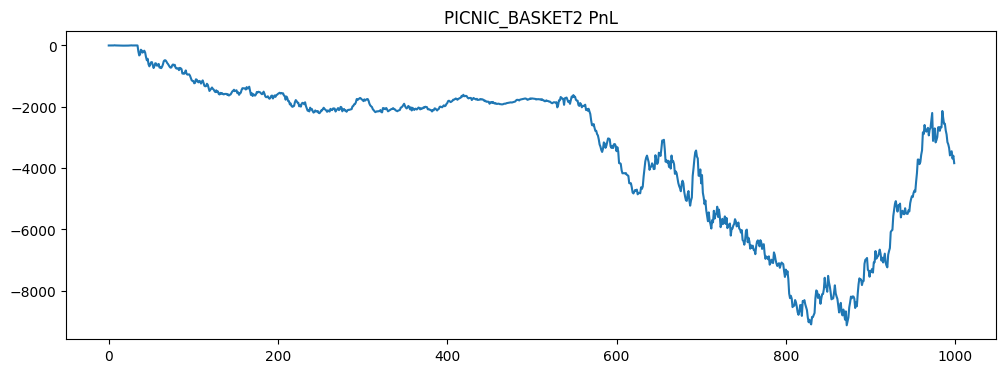

In [201]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy())
plt.title('PICNIC_BASKET2 PnL')
plt.show()

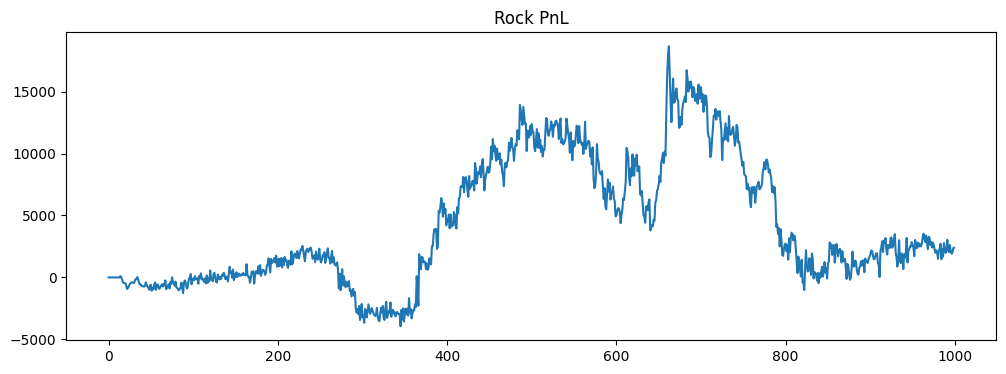

In [202]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
plt.title('Rock PnL')
plt.show()

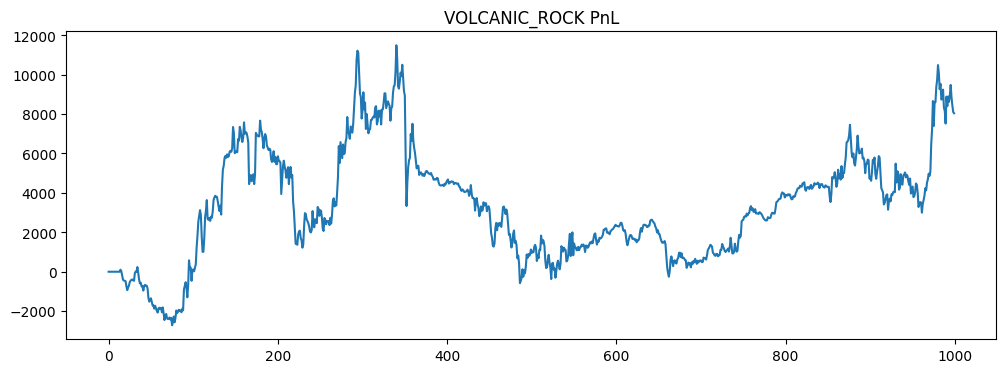

In [203]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK PnL')
plt.show()

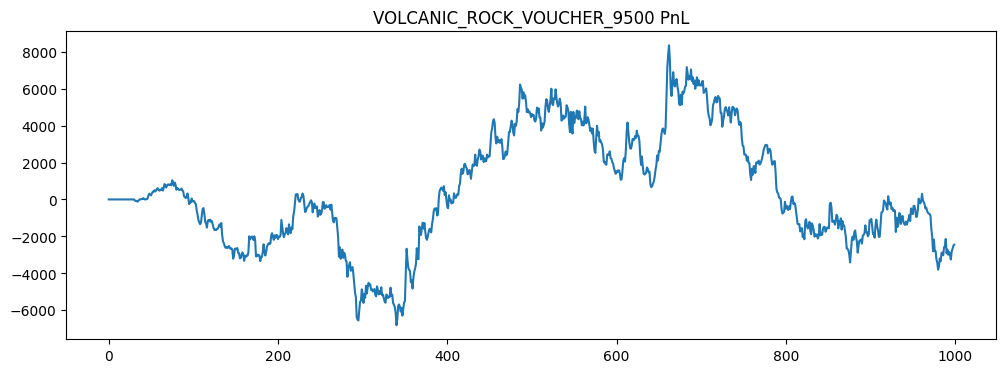

In [204]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK_VOUCHER_9500 PnL')
plt.show()

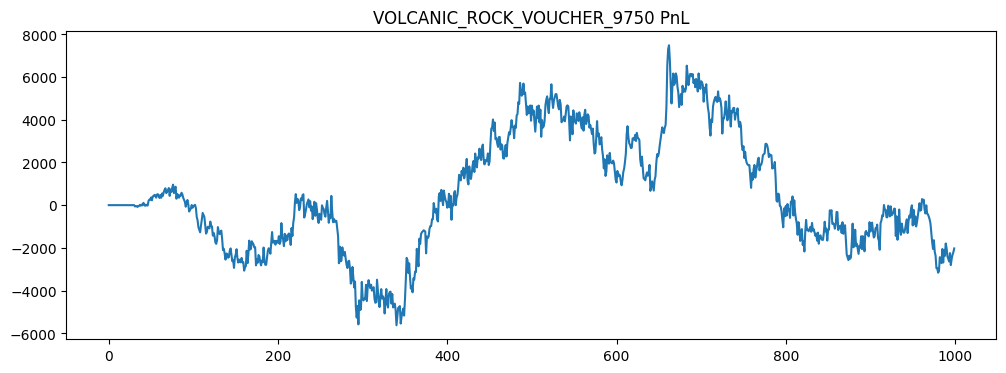

In [205]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK_VOUCHER_9750 PnL')
plt.show()

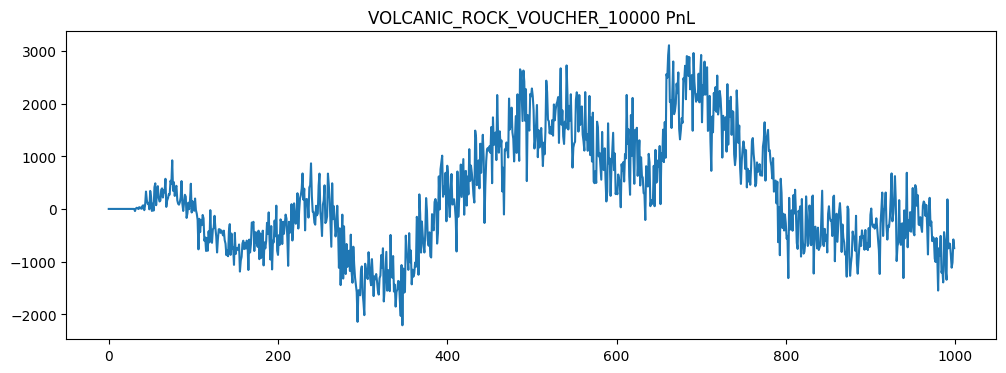

In [206]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK_VOUCHER_10000 PnL')
plt.show()

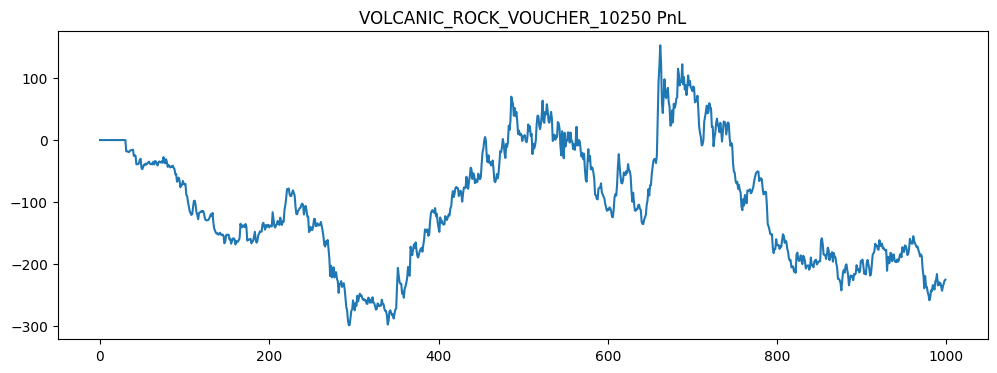

In [207]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK_VOUCHER_10250 PnL')
plt.show()

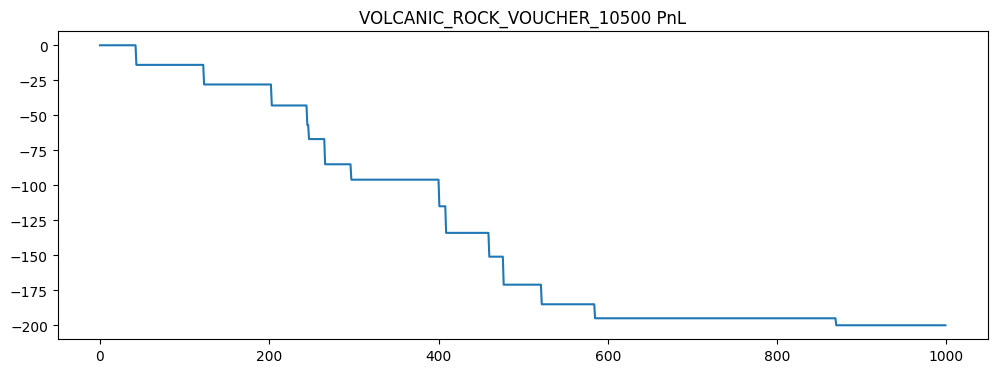

In [208]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
plt.title('VOLCANIC_ROCK_VOUCHER_10500 PnL')
plt.show()

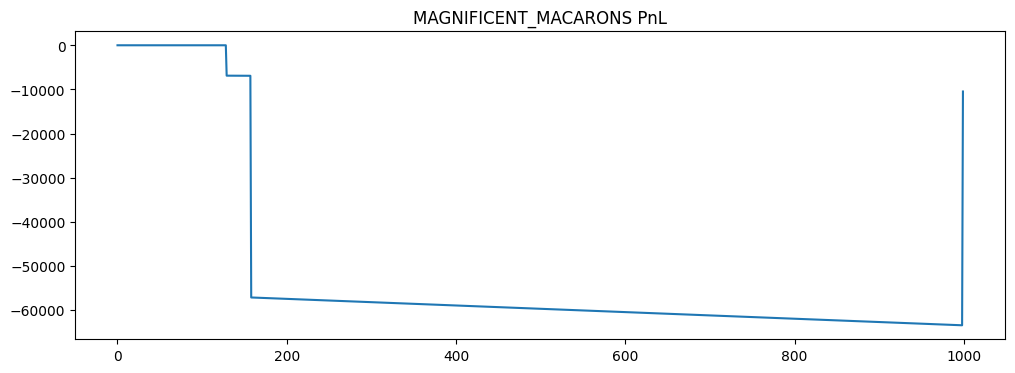

In [209]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'MAGNIFICENT_MACARONS']['profit_and_loss'].to_numpy())
plt.title('MAGNIFICENT_MACARONS PnL')
plt.show()